# Assignment-2B-Task2_memory_consumer
## DISHI JAIN
### 30759307

<IPython.core.display.Javascript object>


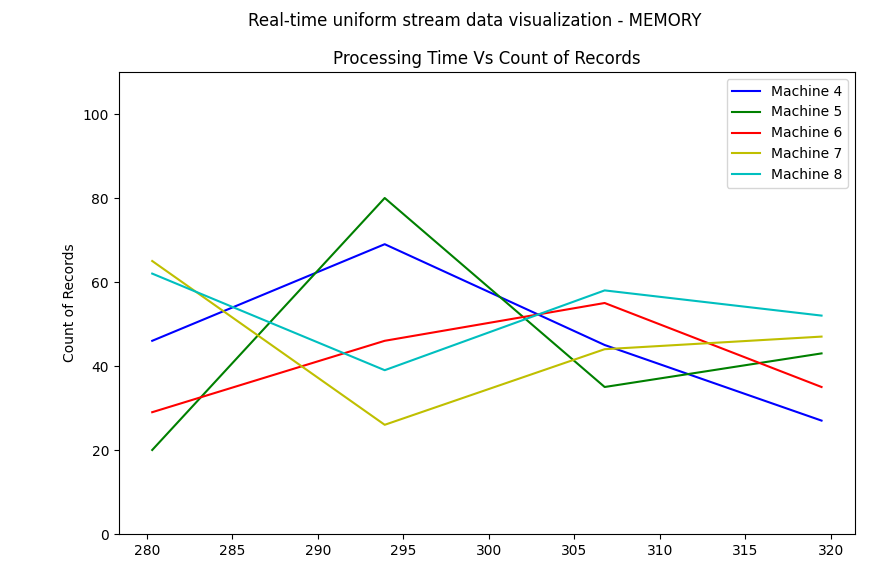

In [2]:
#DISHI

# import statements
from time import sleep
from kafka import KafkaConsumer
import datetime as dt
import matplotlib.pyplot as plt
import statistics

# this line is needed for the inline display of graphs in Jupyter Notebook
%matplotlib notebook

topic = 'memory_final199'


def connect_kafka_consumer():
    _consumer = None
    try:
         _consumer = KafkaConsumer(topic,
                                   consumer_timeout_ms=10000, # stop iteration if no message after 10 sec
                                   auto_offset_reset='earliest', # comment this if you don't want to consume earliest available message
                                   bootstrap_servers=['localhost:9092'],
                                   api_version=(0, 10))
    except Exception as ex:
        print('Exception while connecting Kafka')
        print(str(ex))
    finally:
        return _consumer

def init_plots():
    try:
        width = 9.5
        height = 6
        fig = plt.figure(figsize=(width,height)) # create new figure
        fig.subplots_adjust(hspace=0.8)
        ax1 = fig.add_subplot(111)
        ax1.set_xlabel('Time')
        ax1.set_ylabel('Value')
        fig.suptitle('Real-time uniform stream data visualization - MEMORY') # giving figure a title
        fig.show() # displaying the figure
        fig.canvas.draw() # drawing on the canvas
        return fig, ax1
    except Exception as ex:
        print(str(ex))
    
def consume_messages(consumer, fig, ax1):
    try:
        # container for x and y values
        x1, y1, y2, y3, y4, y5 = [], [], [], [], [], []
        check = 0
        

        for message in consumer:
            #counts for handling the count of records
            count4 = 0
            count5 = 0
            count6 = 0
            count7 = 0
            count8 = 0
            data = eval(message.value.decode('utf-8'))
           
            #appending timestamp of processing divided by 100 as it contains miliseconds
            x1.append(message.timestamp/1000) 
            #storing count of dictionaries 
            for dictionary in data:
                if dictionary['machine'] == 4:
                    count4 = count4 + 1
                    
                if dictionary['machine'] == 5:
                    count5 = count5 + 1
                    
                if dictionary['machine'] == 6:
                    count6 = count6 + 1
                    
                if dictionary['machine'] == 7:
                    count7 = count7 + 1
                    
                if dictionary['machine'] == 8:
                    count8 = count8 + 1
            #appending the cunts to different lists  
            y1.append(count4)
            y2.append(count5)
            y3.append(count6)
            y4.append(count7)
            y5.append(count8)
          
                
            ax1.clear()
            #plotting the timestamp and count of records
            ax1.plot(x1, y1,color = 'b',label = 'Machine 4')
            ax1.plot(x1, y2,color = 'g',label = 'Machine 5')
            ax1.plot(x1, y3,color = 'r',label = 'Machine 6')
            ax1.plot(x1, y4,color = 'y',label = 'Machine 7')
            ax1.plot(x1, y5,color = 'c',label = 'Machine 8')


            ax1.set_xlabel('Processing Time')
            ax1.set_ylabel('Count of Records')
            ax1.set_title('Processing Time Vs Count of Records')
            ax1.set_ylim(0,110) 
            
            ax1.legend()
            fig.canvas.draw()
            #popping when 120 second are exceeded
            while(x1[len(x1)-1] - x1[0] >= 120):
                x1.pop(0) # removing the item in the first position
                y1.pop(0)
                y2.pop(0)
                y3.pop(0)
                y4.pop(0)
                y5.pop(0)
                
                
        plt.close('all')
    except Exception as ex:
        print(str(ex))
    
if __name__ == '__main__':
    
    consumer = connect_kafka_consumer()
    fig, ax1 = init_plots()
    consume_messages(consumer, fig, ax1)
    
    